In [ ]:
!pip install shimmy>=2.0 # Install shimmy using pip
!pip install stable_baselines3
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import cv2
food1_df = pd.read_csv('food1.csv')
food_df = pd.read_csv('food.csv')
doctors_df = pd.read_csv('doctors_list.csv')

In [ ]:
youtube_links = {
    "low_food": "https://youtu.be/huzh8ODNxaA?si=xExT9xJ9obbrUk4w",
    "normal_food": "https://www.youtube.com/watch?v=normal_sugar_food",
    "high_food": "https://www.youtube.com/watch?v=high_sugar_food",
    "light_walking": "https://www.youtube.com/watch?v=light_walking",
    "moderate_jogging": "https://www.youtube.com/watch?v=moderate_jogging",
    "high_intensity": "https://www.youtube.com/watch?v=high_intensity"
}
medicines={
    'high':['Metformin','Sitagliptin'],
    'low':['Glucose tablets','some fruit juices']
}

In [ ]:
category='0'
def get_food_suggestions(sugar_level):
    if sugar_level < 90:
        category = "Low"
        fev=input("do you have fever ")
        if fev=='yes':
          print("\n\you can avoid meet or icecreams or candies\n")
        print("Excercises : \n")

        image = cv2.imread("low_exp2.png")  # Change extension if needed (e.g., .png)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        print("food\n")
        image2=cv2.imread("food_low.png")
        image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
        plt.imshow(image2)
        plt.axis('off')
        plt.show()
        print("\n problems you may face if diet is not followed")
        print("\n\nIf you are not following the diet and excercises following consequence may happen to you \n dizziness \n rapid heart beat \n if sugar is low comma also may come.\n brain damage also comes\n\n")
        return food1_df[food1_df['Category'] == 'low']['Description'].tolist(),youtube_links['low_food'],category,medicines['low']
    elif 90 <= sugar_level <= 140:
        category = "Normal"
        return food_df[food_df['Category'] == 'normal']['Description'].tolist(), youtube_links["normal_food"], category
    else:
        category = "High"
        print("Exercises : \n")
        image3=cv2.imread("high_exp.png")
        image3=cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
        plt.imshow(image3)
        plt.axis('off')
        plt.show()
        print("food\n")
        image4=cv2.imread("food_high.png")
        image4=cv2.cvtColor(image4,cv2.COLOR_BGR2RGB)
        plt.imshow(image4)
        plt.axis('off')
        plt.show()
        print("\n\nif you are not following the diet or excercise plan \n dehydration, high sugar affects brain functions etc\n\n")
        return food1_df[food1_df['Category'] == 'high']['Description'].tolist(), youtube_links["high_food"], category,medicines['high']


<>:7: DeprecationWarning: invalid escape sequence '\y'


In [ ]:
def get_best_doctor():
    best_doctor = doctors_df.sort_values(by='Rating', ascending=False).iloc[0]
    return best_doctor['Name'], best_doctor['Phone Number'], best_doctor['Address']

class DiabetesEnv(gym.Env):
    def __init__(self):
        super(DiabetesEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(3)
        self.observation_space = gym.spaces.Box(low=50, high=250, shape=(1,), dtype=np.float32)
        self.current_sugar_level = np.random.randint(90, 180)

    def step(self, action):
        if action == 0:
            self.current_sugar_level += random.randint(-5, 5)
        elif action == 1:
            self.current_sugar_level += random.randint(-10, 5)
        else:
            self.current_sugar_level += random.randint(-15, 5)

        reward = -abs(self.current_sugar_level - 110)
        done = False
        return np.array([self.current_sugar_level]), reward, done, {}

    def reset(self):
        self.current_sugar_level = np.random.randint(90, 180)
        return np.array([self.current_sugar_level])

In [ ]:
model = PPO("MlpPolicy", DummyVecEnv([lambda: DiabetesEnv()]), verbose=0)
model.learn(total_timesteps=10000)

def get_exercise_suggestion(sugar_level):
    obs = np.array([sugar_level])
    action, _ = model.predict(obs)
    if action == 0:
        return "Light walking", youtube_links["light_walking"]
    elif action == 1:
        return "Moderate jogging", youtube_links["moderate_jogging"]
    else:
        return "High-intensity exercise", youtube_links["high_intensity"]

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Enter patient name: abeed
Enter sugar level for week 1: 86
do you have fever yes

\you can avoid meet or icecreams or candies

Excercises : 



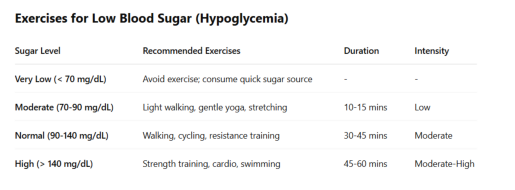

food



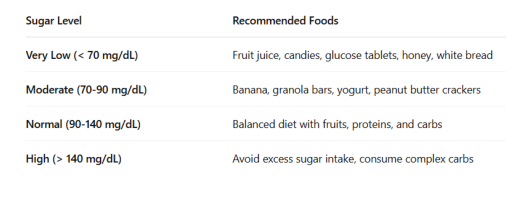


 problems you may face if diet is not followed


If you are not following the diet and excercises following consequence may happen to you 
 dizziness 
 rapid heart beat 
 if sugar is low comma also may come.
 brain damage also comes


Food suggestions for Low Sugar Level: []
Image not found. Please check the file name and path.
Medicines suggestions: ['Glucose tablets', 'some fruit juices']
Enter sugar level for week 2: 89
Enter sugar level for week 3: 88
Enter sugar level for week 4: 92


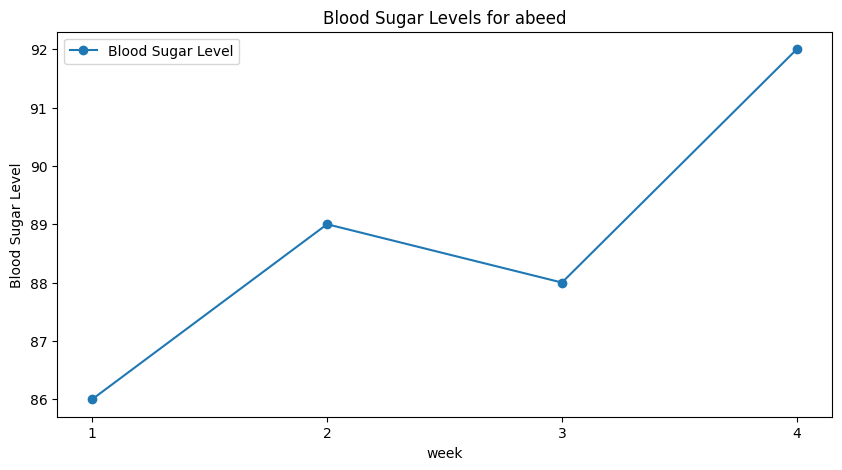

Good! Continue the current diet and exercise plan for another one week
[(1, 86.0), (2, 89.0), (3, 88.0), (4, 92.0)]


In [ ]:


def input_sugar_levels():
    patient_name = input("Enter patient name: ")
    sugar_levels = []
    category = None  # To store the sugar level category

    for week in range(1, 5):
        sugar_level = float(input(f"Enter sugar level for week {week}: "))
        sugar_levels.append((week, sugar_level))

        # If sugar level is very high on the first day, suggest doctor immediately
        if week == 1 and sugar_level > 200:
            best_doctor, phone, address = get_best_doctor()
            print(f"Consult a doctor {best_doctor}, Contact: {phone}, Address: {address}")
            return  # Continue collecting data for the rest of the days

        if week == 1:
            food_suggestions, food_image, category, medicines_suggestion = get_food_suggestions(sugar_level)
            exercise_suggestion, exercise_video = get_exercise_suggestion(sugar_level)

            print(f"Food suggestions for {category} Sugar Level: {food_suggestions}")

            # **Call another function to display the image**
            display_food_image(food_image)

            if medicines_suggestion:
                print(f"Medicines suggestions: {medicines_suggestion}")

    # Plot the sugar levels over 7 days
    weeks, levels = zip(*sugar_levels)
    plt.figure(figsize=(10, 5))
    plt.plot(weeks, levels, marker='o', linestyle='-', label='Blood Sugar Level')
    plt.xlabel('week')
    plt.ylabel('Blood Sugar Level')
    plt.title(f'Blood Sugar Levels for {patient_name}')
    plt.legend()
    plt.xticks(weeks,[int(w) for w in weeks])
    plt.show()

    # Final analysis after 7 days
    if (sugar_levels[0][1] > sugar_levels[-1][1] and category == 'High') or \
       (sugar_levels[0][1] < sugar_levels[-1][1] and category == 'Low'):
        print("Good! Continue the current diet and exercise plan for another one week")
        print(sugar_levels)
    elif 90 <= sugar_levels[-1][1] <= 140 and category == 'Normal':
        print("You are normal now")
    else:
        best_doctor, phone, address = get_best_doctor()
        print(f"No significant improvement. Consult {best_doctor}. Contact: {phone}, Address: {address}")
# **Function to display the food image separately**
def display_food_image(image_name):
    image_path = f"/mnt/data/{image_name}"  # Ensure correct image path
    try:
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis("off")  # Hide axes
        plt.show()
    except FileNotFoundError:
        print("Image not found. Please check the file name and path.")

# Call the function
input_sugar_levels()


In [ ]:
!pip install flask flask-ngrok